In [1]:
import snappy
from snappy import ProductIO
import os
import calibrate
import gc
import pandas as pd

#filepath = '/Users/yangchao/GitHub/wind/download/'
filepath = '/Volumes/Yangchao/Sentient/'

#filepath = '/Users/yangchao/GitHub/wind/snap/data/'
Height = 400
Width = 400

subsetop = snappy.jpy.get_type('org.esa.snap.core.gpf.common.SubsetOp')
wktreader = snappy.jpy.get_type('com.vividsolutions.jts.io.WKTReader')
rectangel = snappy.jpy.get_type('java.awt.Rectangle')
pixelpos = snappy.jpy.get_type('org.esa.snap.core.datamodel.PixelPos')
geopos = snappy.jpy.get_type('org.esa.snap.core.datamodel.GeoPos')
mask = snappy.jpy.get_type('org.esa.snap.raster.gpf.masks.CreateLandMaskOp')

In [2]:
# get the match up wind filed
def wind_filed_from_ndbc(station, time):
    time_string = time[0:4]+' '+time[4:6]+' '+time[6:8]+' '+time[9:11]+' '+str(int(time[11:13])//10*10)
    with os.popen('cd /Volumes/Yangchao/data/ndbc/ \n grep "'+time_string+'" '+station+'*') as file_:
        datas = file_.readlines()
        if len(datas) == 0:
            return 0, 0
        else:
            for data in datas:
                wdir = data.split(':')[1][17:20]
                wspeed = data.split(':')[1][21:25]
            return wdir, wspeed



In [3]:
# match up the data
def match_up(file1, filename, stations, scending):
    print('match_up...')
    geo = file1.getSceneGeoCoding()
    size = file1.getSceneRasterSize()
    if geo.canGetGeoPos():
        for station in stations.index:
            p1 = geo.getPixelPos(geopos(stations.loc[station, 'lat'], stations.loc[station,'lon']), None)
            if p1.getX() == 'None':
                continue
            x = p1.getX() - Height / 2
            y = p1.getY() - Width / 2
            if file1.containsPixel(p1) and file1.containsPixel(pixelpos(int(x), int(y))):
                flist = filename.split('_')
                wdir, wspeed = wind_filed_from_ndbc(station, flist[-5])
                if wdir == 0 or wspeed == 0 or wspeed==99 or wdir==999 or wdir == '0' or wspeed == '0' or wspeed== '99' or wdir=='999' :
                    continue
                else:
                    print(flist[-1].split('.')[0])
                    print(station)
                    print(x, y)
                    print(size.getHeight(), size.getWidth())
                    if size.getHeight() > 400 and size.getWidth > 400:
                        subfile = subset(file1, int(x), int(y))
                        if subfile is False:
                            print('cut exception')
                            continue
                        print('write...')
                        print(filename, station)
#                         try:
                        print(scending, station, wdir,wspeed, stations.loc[station, 'height'], filename)
                        ProductIO.writeProduct(subfile, '/Volumes/Yangchao/subset/'+scending+'_'+station+'_subset_'+str(wdir)+'_'+str(wspeed)+'_'+str(stations.loc[station,'height'])+'_'+filename.split('.')[0], 'BEAM-DIMAP')
#                         except Exception:
#                             print('exception')
#                             print(Exception.message)
#                             subfile.dispose()
#                             continue
                        subfile.dispose()
                        del subfile
                    else:
                        print('copy...')
                        try:
                            ProductIO.writeProduct(file1, '/Volumes/Yangchao/subset/'+scending+'_'+station+'_subset_'+str(wdir)+'_'+str(wspeed)+'_'+str(stations.loc[station,'height'])+'_'+filenamesplit('.')[0], 'BEAM-DIMAP')
                        except Exception:
                            print('exception')
                            continue
    else:
        print(filename + " can't get geo pos")

    del size
    del geo
    file1.dispose()
    del file1
    gc.collect()




In [4]:
def subset(file_, x, y):
    print('----subsetting----')
    sbop = subsetop()
    sbop.setSourceProduct(file_)
    # wkt = wktreder()
    # geometry = wkt.read(wkt)
    # sbop.setGeoRegion(geometry)
    sbop.setRegion(rectangel(x, y, Height, Width))
    sbop.setCopyMetadata(True)
#     try:
    subfile = sbop.getTargetProduct()
#     except Exception:
#         subfile = False
#     finally:
#         del sbop
    return subfile

In [5]:

stations = pd.read_csv('/Volumes/Yangchao/data/ndbc_station_information.csv')
im = pd.read_csv('/Volumes/Yangchao/Sentinel_information.csv',dtype={'Granule Name':'str', 'Ascending or Descending?':'str'})
new = im.set_index('Granule Name')
stations.set_index('name', inplace=True)

for z in im['Granule Name']:
    scending = new.loc[z, 'Ascending or Descending?']
    file_1 = ProductIO.readProduct('/Volumes/Yangchao/Sentient/'+z+'.zip')
    source = calibrate.thermal_app(file_1)
    match_up(source, z+'.zip', stations, scending)
    file_1.dispose()
    del file_1
    gc.collect()

thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
AA68
44065
(11851.577422307848, 15755.25088038595)
(16700.0, 25904.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170723T225031_20170723T225056_017605_01D74D_AA68.zip', '44065')
('Ascending', '44065', ' 96', ' 7.4', 5.0, 'S1A_IW_GRDH_1SDV_20170723T225031_20170723T225056_017605_01D74D_AA68.zip')
AA68
44066
(19734.394091525337, 5517.491935883146)
(16700.0, 25904.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170723T225031_20170723T225056_017605_01D74D_AA68.zip', '44066')
('Ascending', '44066', ' 90', ' 6.6', 5.0, 'S1A_IW_GRDH_1SDV_20170723T225031_20170723T225056_017605_01D74D_AA68.zip')
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
1B1F
41001
(9944.112464494683, 2372.3773391027

41037
(3190.5614560318554, 13474.594294660452)
(16756.0, 25800.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170709T230518_20170709T230543_017401_01D117_3E98.zip', '41037')
('Ascending', '41037', '162', ' 4.7', 2.9500000000000002, 'S1A_IW_GRDH_1SDV_20170709T230518_20170709T230543_017401_01D117_3E98.zip')
3E98
41038
(265.6830019984809, 15725.371935746281)
(16756.0, 25800.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170709T230518_20170709T230543_017401_01D117_3E98.zip', '41038')
('Ascending', '41038', '189', ' 3.6', 2.9500000000000002, 'S1A_IW_GRDH_1SDV_20170709T230518_20170709T230543_017401_01D117_3E98.zip')
3E98
41064
(7374.633297943895, 15134.208991683508)
(16756.0, 25800.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170709T230518_20170709T230543_017401_01D117_3E98.zip', '41064')
('Ascending', '41064', '205', ' 4.6', 2.9500000000000002, 'S1A_IW_GRDH_1SDV_20170709T230518_20170709T230543_017401_01D117_3E98.zip')
thermal remove
apply orbit file
match_up...
1C5B
41002
(

thermal remove
apply orbit file
match_up...
856D
44066
(2341.2598150061185, 6056.340859381142)
(16701.0, 25907.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170624T224220_20170624T224245_017182_01CA82_856D.zip', '44066')
('Ascending', '44066', '234', ' 5.1', 5.0, 'S1A_IW_GRDH_1SDV_20170624T224220_20170624T224245_017182_01CA82_856D.zip')
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
8CBB
41004
(3020.6633456476757, 7776.369145634484)
(16751.0, 25815.0)
----subsettin

37E4
drfa2
(19427.053985698174, 9174.256104271959)
(16653.0, 25561.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170531T035145_20170531T035210_005837_00A3B4_37E4.zip', 'drfa2')
('Ascending', 'drfa2', '212', ' 1.1', 6.5999999999999996, 'S1B_IW_GRDH_1SDV_20170531T035145_20170531T035210_005837_00A3B4_37E4.zip')
thermal remove
apply orbit file
match_up...
4F2D
amaa2
(17337.770307065017, 7869.5115298533165)
(16652.0, 25551.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170531T035120_20170531T035145_005837_00A3B4_4F2D.zip', 'amaa2')
('Ascending', 'amaa2', '324', ' 1.8', 15.699999999999999, 'S1B_IW_GRDH_1SDV_20170531T035120_20170531T035145_005837_00A3B4_4F2D.zip')
4F2D
auga2
(10450.71189880701, 14287.941459987605)
(16652.0, 25551.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170531T035120_20170531T035145_005837_00A3B4_4F2D.zip', 'auga2')
('Ascending', 'auga2', '354', ' 1.3', 6.5999999999999996, 'S1B_IW_GRDH_1SDV_20170531T035120_20170531T035145_005837_00A3B4_4F2D.zip')
4F2D
fi

7F64
42044
(15102.994594800466, 612.8996194686991)
(16752.0, 25564.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170530T003353_20170530T003418_016804_01BEDA_7F64.zip', '42044')
('Ascending', '42044', ' 92', ' 0.6', 3.3999999999999999, 'S1A_IW_GRDH_1SDV_20170530T003353_20170530T003418_016804_01BEDA_7F64.zip')
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
CB27
45006
(11799.72989125581, 10592.119464642636)
(16670.0, 25960.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170529T234926_20170529T234951_005820_00A33D_CB27.zip', '45006')
('Ascending', '45006', '248', ' 7.7', 5.0, 'S1B_IW_GRDH_1SDV_20170529T234926_20170529T234951_005820_00A33D_CB27.zip')
CB27
45023
(20518.578198049527, 8422.918765450133)
(16670.0, 25960.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170529T234926_20170529T234951_005820_00A33D_CB27.zip', '45023')
('Ascending', '45023', '254', ' 7.0', 3.0, 'S1B_IW_GRDH_1SDV_2017052

0095
mism1
(23975.265684864065, 11369.855083264443)
(16694.0, 25513.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170526T223501_20170526T223526_016759_01BD80_0095.zip', 'mism1')
('Ascending', 'mism1', '347', ' 5.4', 22.899999999999999, 'S1A_IW_GRDH_1SDV_20170526T223501_20170526T223526_016759_01BD80_0095.zip')
thermal remove
apply orbit file
match_up...
8CF2
44013
(6863.225215513406, 17629.316989504186)
(19387.0, 25503.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170526T223432_20170526T223501_016759_01BD80_8CF2.zip', '44013')
('Ascending', '44013', ' 63', ' 1.5', 5.0, 'S1A_IW_GRDH_1SDV_20170526T223432_20170526T223501_016759_01BD80_8CF2.zip')
8CF2
buzm3
(1790.3070250186793, 8003.074998081771)
(19387.0, 25503.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170526T223432_20170526T223501_016759_01BD80_8CF2.zip', 'buzm3')
('Ascending', 'buzm3', '250', ' 4.7', 24.800000000000001, 'S1A_IW_GRDH_1SDV_20170526T223432_20170526T223501_016759_01BD80_8CF2.zip')
thermal remove
apply o

(19034.0, 25143.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170524T155934_20170524T160002_005742_00A0F0_5BB2.zip', '51004')
('Descending', '51004', ' 44', ' 5.8', 4.0, 'S1B_IW_GRDH_1SDV_20170524T155934_20170524T160002_005742_00A0F0_5BB2.zip')
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
D799
51002
(7024.794906031172, 9601.597618847762)
(19468.0, 25189.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170524T043801_20170524T043830_016719_01BC36_D799.zip', '51002')
('Ascending', '51002', ' 70', ' 8.4', 4.0, 'S1A_IW_GRDH_1SDV_20170524T043801_20170524T043830_016719_01BC36_D799.zip')
thermal remove
apply orbit file
match_up...
DF4F
46100
(24980.539649617618, 10963.481247281677)
(14573.0, 25565.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170524T021720_20170524T021742_005734_00A0BC_DF4F.zip', '46100')
('Ascending', '46100', '329', '10.5', 4.5, 'S

thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
7DE0
45012
(21567.216142244855, 411.407306153988)
(16423.0, 25868.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170522T230810_20170522T230834_016701_01BBB0_7DE0.zip', '45012')
('Ascending', '45012', '254', ' 5.7', 5.0, 'S1A_IW_GRDH_1SDV_20170522T230810_20170522T230834_016701_01BBB0_7DE0.zip')
thermal remove
apply orbit file
match_up...
670A
dbln6
(3714.7672746032476, 7659.6065454772415)
(16755.0, 25859.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170522T230745_20170522T230810_016701_01BBB0_670A.zip', 'dbln6')
('Ascending', 'dbln6', '235', ' 6.3', 20.399999999999999, 'S1A_IW_GRDH_1SDV_20170522T230745_20170522T230810_016701_01BBB0_670A.zip')
thermal remove
apply orbit file
match_up...
8D17
44041
(14762.47890717429, 13782.523350807693)
(16755.0, 25818.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170522T230605_20170522T230630_016701_01BBB0_8D17.zip', '44041')
('Ascending', '44041', '

thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
A68C
46061
(25164.91325702102, 7392.340039417455)
(19339.0, 25477.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.zip', '46061')
('Ascending', '46061', '355', ' 5.1', 5.0, 'S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.zip')
A68C
46076
(17596.63531314284, 487.7860819981606)
(19339.0, 25477.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.zip', '46076')
('Ascending', '46076', ' 14', ' 8.8', 5.0, 'S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.zip')
A68C
46081
(18563.28286614114, 14818.05928869526

thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
5021
51004
(20604.78229041474, 9435.051961234192)
(19463.0, 25202.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170520T042057_20170520T042126_005677_009F19_5021.zip', '51004')
('Ascending', '51004', ' 59', ' 7.6', 4.0, 'S1B_IW_GRDH_1SDV_20170520T042057_20170520T042126_005677_009F19_5021.zip')
thermal remove
apply orbit file
match_up...
566B
srst2
(11517.245445827288, 4089.9816314558284)
(16758.0, 25671.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170520T001818_20170520T001843_016658_01BA5D_566B.zip', 'srst2')
('Ascending', 'srst2', '129', ' 7.8', 9.0999999999999996, 'S1A_IW_GRDH_1SDV_20170520T001818_20170520T001843_016658_01BA5D_566B.zip')
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
624C
45004
(5696.959343677341, 4888.201922011584)
(16685.0, 25803.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_201

thermal remove
apply orbit file
match_up...
BBF6
46050
(8733.028245771522, 8226.537837667778)
(16701.0, 25930.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.zip', '46050')
('Ascending', '46050', '357', ' 2.5', 4.0, 'S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.zip')
BBF6
46097
(10303.532342081387, 7525.687762290632)
(16701.0, 25930.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.zip', '46097')
('Ascending', '46097', '357', ' 2.8', 4.5, 'S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.zip')
BBF6
nwpo3
(12103.439071327492, 6922.523027086388)
(16701.0, 25930.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.zip', 'nwpo3')
('Ascending', 'nwpo3', '343', ' 3.8', 9.4000000000000004, 'S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.zip')
thermal remove
apply orbit file
match_u

3824
46026
(10017.274288189554, 13471.011331134647)
(16716.0, 25538.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170518T141539_20170518T141604_016637_01B9B7_3824.zip', '46026')
('Descending', '46026', '330', ' 4.2', 5.0, 'S1A_IW_GRDH_1SDV_20170518T141539_20170518T141604_016637_01B9B7_3824.zip')
thermal remove
apply orbit file
match_up...
F4A7
46014
(22580.781070225457, 15841.012143901291)
(16715.0, 25548.0)
----subsetting----
write...
('S1A_IW_GRDH_1SDV_20170518T141514_20170518T141539_016637_01B9B7_F4A7.zip', '46014')
('Descending', '46014', '338', '10.1', 4.0, 'S1A_IW_GRDH_1SDV_20170518T141514_20170518T141539_016637_01B9B7_F4A7.zip')
thermal remove
apply orbit file
match_up...
thermal remove
apply orbit file
match_up...
D46F
51002
(7034.987829316447, 9593.22596508905)
(19462.0, 25189.0)
----subsetting----
write...
('S1B_IW_GRDH_1SDV_20170518T043719_20170518T043748_005648_009E41_D46F.zip', '51002')
('Ascending', '51002', ' 76', ' 9.0', 4.0, 'S1B_IW_GRDH_1SDV_20170518T043719_2017

RuntimeError: org.esa.snap.core.gpf.OperatorException: java.io.IOException: Zip file is corrupt S1B_IW_GRDH_1SDV_20170517T022823_20170517T022851_005632_009DD4_6A67.zip

In [6]:
gc.collect()
with os.popen('cd /Volumes/Yangchao/subset/ \n ls *.dim') as files1:
    for file_2 in files1:
        print(file_2[:-1])
        f = ProductIO.readProduct('/Volumes/Yangchao/subset/'+file_2[:-1])
        c = calibrate.calibrate(f)
        ProductIO.writeProduct(c, '/Volumes/yangchao/subset_netcdf/'+file_2[:-5], 'NetCDF4-CF')

Ascending_41001_subset_132_ 4.0_4.0_S1A_IW_GRDH_1SDV_20170629T224915_20170629T224940_017255_01CCB2_E50C.dim
calibrate
Ascending_41001_subset_201_ 5.9_4.0_S1A_IW_GRDH_1SDV_20170711T224915_20170711T224940_017430_01D200_26BF.dim
calibrate
Ascending_41001_subset_225_10.4_4.0_S1A_IW_GRDH_1SDV_20170723T224916_20170723T224941_017605_01D74D_1B1F.dim
calibrate
Ascending_41002_subset_181_ 4.4_5.0_S1A_IW_GRDH_1SDV_20170709T230453_20170709T230518_017401_01D117_1C5B.dim
calibrate
Ascending_41002_subset_193_ 3.4_5.0_S1A_IW_GRDH_1SDV_20170522T230450_20170522T230515_016701_01BBB0_8C4E.dim
calibrate
Ascending_41002_subset_199_ 4.7_5.0_S1A_IW_GRDH_1SDV_20170721T230453_20170721T230518_017576_01D66A_9258.dim
calibrate
Ascending_41002_subset_222_ 3.0_5.0_S1A_IW_GRDH_1SDV_20170627T230452_20170627T230517_017226_01CBD2_C568.dim
calibrate
Ascending_41004_subset_194_ 5.8_4.0_S1A_IW_GRDH_1SDV_20170702T231315_20170702T231340_017299_01CE10_C1B4.dim
calibrate
Ascending_41004_subset_195_ 6.0_4.0_S1A_IW_GRDH_1SDV_201

Ascending_45002_subset_ 17_ 4.9_5.0_S1B_IW_GRDH_1SDV_20170519T233222_20170519T233247_005674_009F04_8CE2.dim
calibrate
Ascending_45002_subset_ 70_ 4.5_5.0_S1B_IW_GRDH_1SDV_20170531T233223_20170531T233248_005849_00A412_807B.dim
calibrate
Ascending_45003_subset_ 82_ 7.1_5.0_S1A_IW_GRDH_1SDV_20170520T232447_20170520T232511_016672_01BACC_C382.dim
calibrate
Ascending_45003_subset_274_ 2.9_5.0_S1B_IW_GRDH_1SDV_20170526T232419_20170526T232448_005776_00A200_5BA7.dim
calibrate
Ascending_45004_subset_289_ 5.9_5.0_S1B_IW_GRDH_1SDV_20170531T233313_20170531T233338_005849_00A412_6C28.dim
calibrate
Ascending_45004_subset_354_ 3.1_5.0_S1B_IW_GRDH_1SDV_20170519T233312_20170519T233337_005674_009F04_624C.dim
calibrate
Ascending_45005_subset_ 78_10.7_4.0_S1A_IW_GRDH_1SDV_20170520T232357_20170520T232422_016672_01BACC_9798.dim
calibrate
Ascending_45006_subset_ 22_12.1_5.0_S1B_IW_GRDH_1SDV_20170517T234925_20170517T234950_005645_009E30_679B.dim
calibrate
Ascending_45006_subset_248_ 7.7_5.0_S1B_IW_GRDH_1SDV_201

In [11]:
data = ProductIO.readProduct('/Volumes/Yangchao/Sentient/S1A_IW_GRDH_1SDV_20151205T094125_20151205T094154_008905_00CBDC_FE9F.zip')

In [12]:
mk = mask()
c = calibrate.calibrate(data)

calibrate


In [13]:
mk.setParameterDefaultValues()
mk.setSourceProduct(c)

d = mk.getTargetProduct()
ProductIO.writeProduct(d, 'S1A_EW_GRDM_1SDV_20170518T234027_20170518T234131_016643_01B9E7_5E03',  'BEAM-DIMAP')

In [3]:
filters =['Boxcar', 'Median', 'Frost', 'Gamma Map', 'Lee', 'Refined Lee', 'Lee Sigma', 'IDAN']

In [4]:
gc.collect()
with os.popen('cd /Volumes/Yangchao/subset/ \n ls *.dim') as files1:
    for file_2 in files1:
        print(file_2[:-1])
        for fil in filters:
            f = ProductIO.readProduct('/Volumes/Yangchao/subset/'+file_2[:-1])
            c = calibrate.calibrate(f)
            d = calibrate.specklefilter(c, fil)
            ProductIO.writeProduct(d, '/Volumes/yangchao/speckle/'+fil+'/'+file_2[:-5], 'NetCDF4-CF')
            f.dispose()
            c.dispose()
            d.dispose()
            gc.collect()

Ascending_41001_subset_132_ 4.0_4.0_S1A_IW_GRDH_1SDV_20170629T224915_20170629T224940_017255_01CCB2_E50C.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_41001_subset_201_ 5.9_4.0_S1A_IW_GRDH_1SDV_20170711T224915_20170711T224940_017430_01D200_26BF.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_41001_subset_225_10.4_4.0_S1A_IW_GRDH_1SDV_20170723T224916_20170723T224941_017605_01D74D_1B1F.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_41002_subset_181_ 4.4_5.0_S1A_IW_GRDH_1SDV_20170709T230453_20170709T230518_017401_01D117_1C5B.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_41002_subset_193_ 3.4_5.0_S1A_IW_GRDH_1SDV_20170522T230450_20170522T230515_016701_01BBB0_8C4E.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_41002_subset_199_ 4.7_5.0_S1A_IW_GRDH_1SDV_2017072

calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_45175_subset_314_ 5.3_2.95_S1B_IW_GRDH_1SDV_20170531T233248_20170531T233313_005849_00A412_7D34.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_45176_subset_ 69_ 5.2_3.0_S1A_IW_GRDH_1SDV_20170520T232357_20170520T232422_016672_01BACC_9798.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_46011_subset_214_ 3.7_5.0_S1B_IW_GRDH_1SDV_20170526T015734_20170526T015759_005763_00A197_7A11.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_46011_subset_318_ 9.2_5.0_S1B_IW_GRDH_1SDV_20170519T020543_20170519T020608_005661_009EA1_F4DF.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_46012_subset_310_ 7.7_5.0_S1B_IW_GRDH_1SDV_20170519T020633_20170519T020658_005661_009EA1_0EC4.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate

calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_amaa2_subset_ 89_ 8.6_15.7_S1B_IW_GRDH_1SDV_20170519T035119_20170519T035144_005662_009EA7_1B8F.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_amaa2_subset_324_ 1.8_15.7_S1B_IW_GRDH_1SDV_20170531T035120_20170531T035145_005837_00A3B4_4F2D.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_auga2_subset_124_ 5.1_6.6_S1B_IW_GRDH_1SDV_20170519T035119_20170519T035144_005662_009EA7_1B8F.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_auga2_subset_354_ 1.3_6.6_S1B_IW_GRDH_1SDV_20170531T035120_20170531T035145_005837_00A3B4_4F2D.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
calibrate
Ascending_blia2_subset_302_ 2.8_21.6_S1B_IW_GRDH_1SDV_20170523T031848_20170523T031917_005720_00A055_CF85.dim
calibrate
calibrate
calibrate
calibrate
calibrate
calibra

In [1]:
from netCDF4 import Dataset

In [2]:
file_ = Dataset('./da/subset_0_of_S1A_IW_GRDH_1SDV_20151220T100502_20151220T100531_009124_00D1EC_89E6_Noise-Cor_Cal.nc')

In [3]:
file_.variables

OrderedDict([('Sigma0_VH', <class 'netCDF4._netCDF4.Variable'>
              float32 Sigma0_VH(y, x)
                  long_name: 
                  units: intensity
                  _FillValue: 0.0
                  coordinates: lat lon
              unlimited dimensions: 
              current shape = (5781, 25190)
              filling off), ('Sigma0_VV', <class 'netCDF4._netCDF4.Variable'>
              float32 Sigma0_VV(y, x)
                  long_name: 
                  units: intensity
                  _FillValue: 0.0
                  coordinates: lat lon
              unlimited dimensions: 
              current shape = (5781, 25190)
              filling off), ('new_band_1', <class 'netCDF4._netCDF4.Variable'>
              float32 new_band_1(y, x)
                  long_name: 
                  units: 
                  _FillValue: nan
                  coordinates: lat lon
              unlimited dimensions: 
              current shape = (5781, 25190)
              fil

In [4]:
incidence = file_.variables['incident_angle'][:]

In [5]:
nesz = file_.variables['new_band_1'][:]

In [6]:
import numpy as np

In [7]:
n_ = np.mean(nesz, axis=0)
i_ = np.mean(incidence, axis=0)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/yangchao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


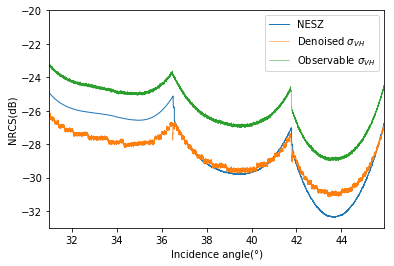

In [41]:
plt.plot(i_, n_,label ='NESZ',linewidth=1)
plt.plot(i_, 10*np.log10(s_), label='Denoised $\sigma_{VH}$',linewidth=0.5)
plt.plot(i_, 10*np.log10(s_n), label='Observable $\sigma_{VH}$',linewidth=0.5)
plt.xlabel('Incidence angle(°)')
plt.ylabel('NRCS(dB)')
plt.xlim(31, 45.9)
plt.ylim(-33,-20)
plt.legend()
plt.savefig('nesz.eps')

In [14]:
sigma_vh = file_.variables['Sigma0_VH'][:]

In [15]:
s_ = np.mean(sigma_vh, axis=0)

In [16]:
file_1 = Dataset('./da/subset_0_of_S1A_IW_GRDH_1SDV_20151220T100502_20151220T100531_009124_00D1EC_89E6_Cal.nc')

In [17]:
sigma_vh_n = file_1.variables['Sigma0_VH'][:]

In [18]:
s_n = np.mean(sigma_vh_n, axis=0)